## 1. Load the Dataset

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Feature's description:

The Boston Housing dataset originates from the 1970 U.S. Census. Each row in the dataset represents a town or tract (subdivision of a county) in the Boston area, and the columns describe different socio-economic and geographic characteristics. 

CRIM - number of crimes reported per person in the tract or town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - Percentage of land occupied by industrial or commercial properties (excluding retail).

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

## 2. Define the objective
### What do we want to predict?
We want to predict the target variable MEDV - Median value of owner-occupied homes in $1000's

### Is it a classification or regression problem?
It is a regression problem

## 3. Exploratory data analysis (EDA)

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [278]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [279]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [280]:
null_values_rm = df[df['rm'].isnull()]
null_values_rm

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
10,0.22489,12.5,7.87,0,0.524,NaN,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
35,0.06417,0.0,5.96,0,0.499,NaN,68.2,3.3603,5,279,19.2,396.90,9.68,18.9
63,0.12650,25.0,5.13,0,0.453,NaN,43.4,7.9809,8,284,19.7,395.58,9.50,25.0
96,0.11504,0.0,2.89,0,0.445,NaN,69.6,3.4952,2,276,18.0,391.83,11.34,21.4
135,0.55778,0.0,21.89,0,0.624,NaN,98.2,2.1107,4,437,21.2,394.67,16.96,18.1


In [281]:
df['rm'] = df['rm'].fillna(df['rm'].mean())
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [282]:
df.duplicated().sum()

0

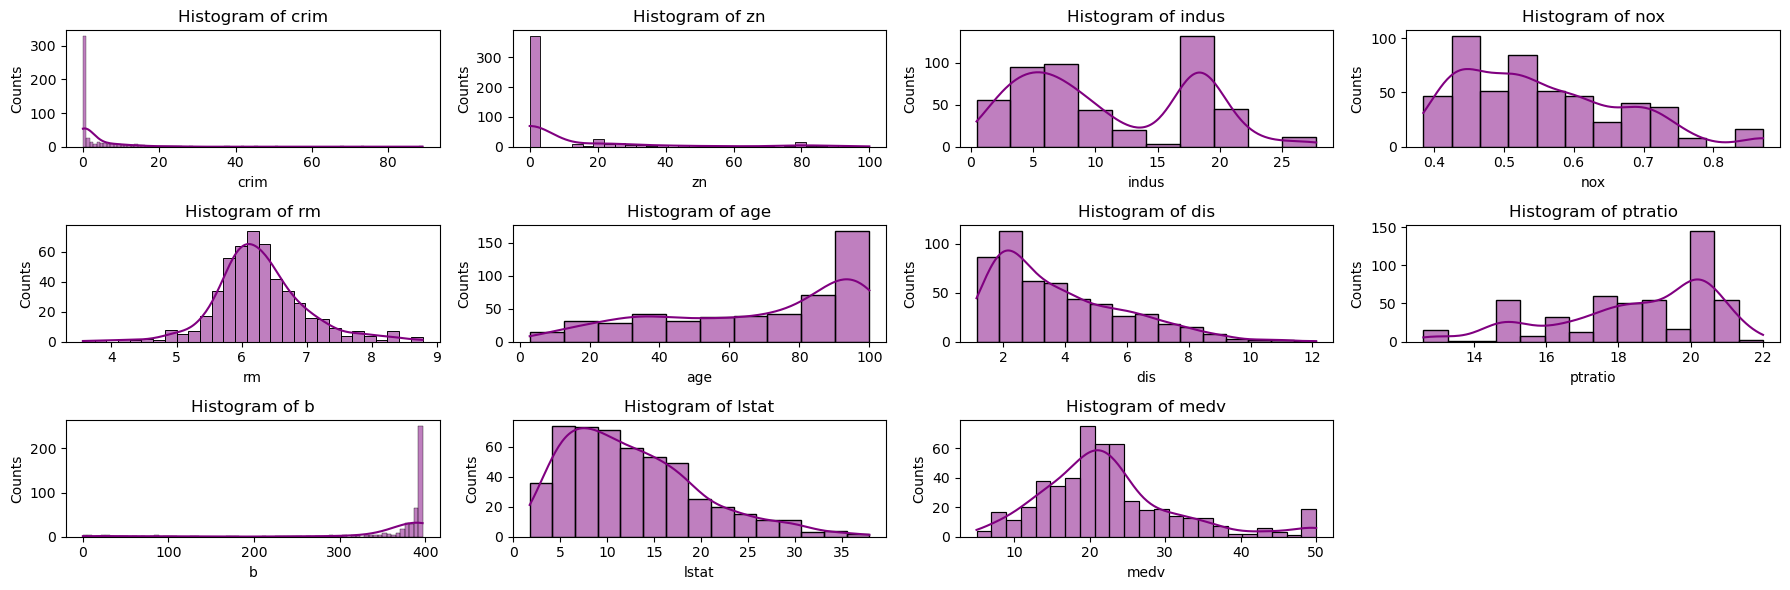

In [283]:
plt.figure(figsize=(18,6))

continuous_features = df.select_dtypes(include = 'float64').columns
c_rows = np.ceil(len(continuous_features) / 4).astype('int64')
n = len(df)

for i, cf in enumerate (continuous_features):

    plt.subplot(c_rows, 4, i+1)
    
    sns.histplot(data=df, x=cf, kde = True, color = 'purple', edgecolor = 'black')
    plt.title(f'Histogram of {cf}')
    plt.xlabel(cf)
    plt.ylabel('Counts')

plt.tight_layout()
plt.show()

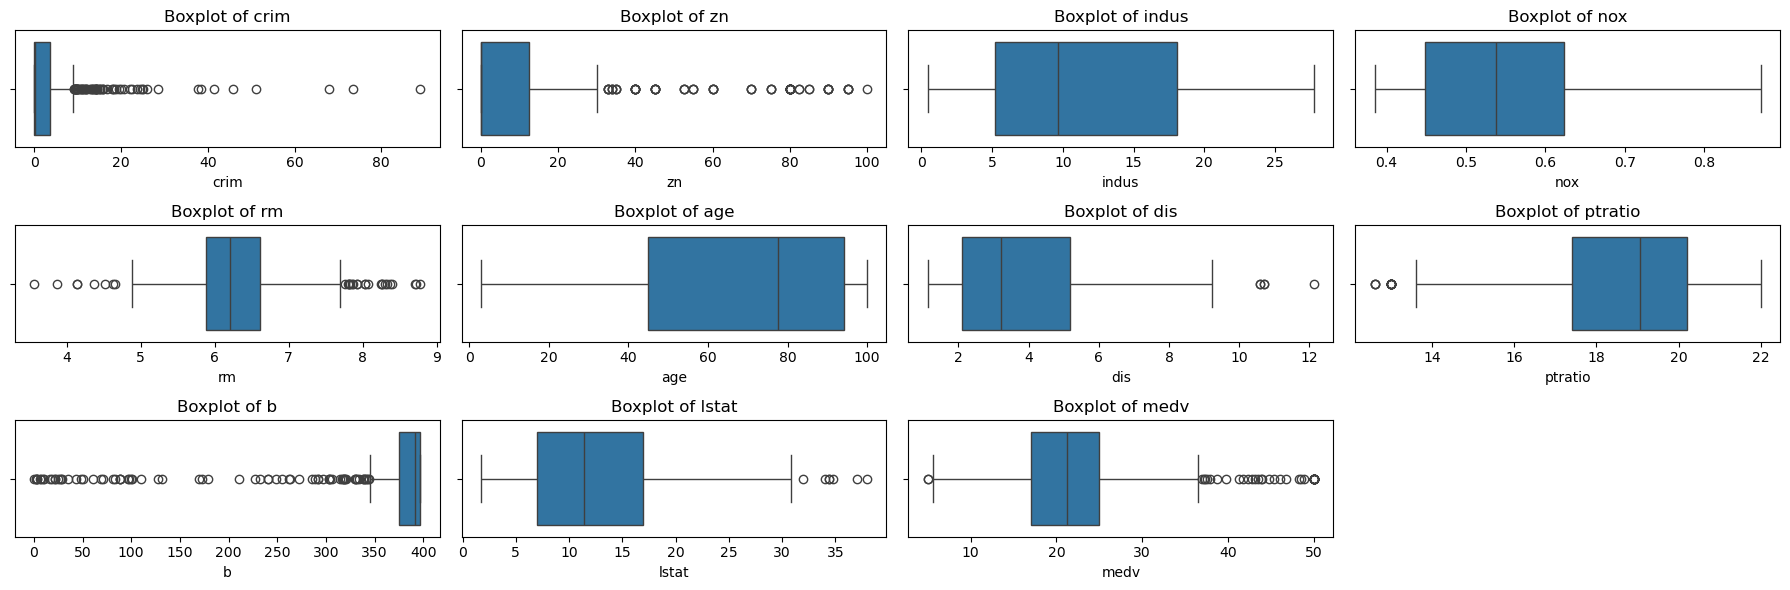

In [284]:
plt.figure(figsize=(18,6))

for i, cf in enumerate (continuous_features):

    plt.subplot(c_rows, 4, i+1)
    
    sns.boxplot(data = df, x = cf)
    plt.title(f'Boxplot of {cf}')
    plt.xlabel(cf)

plt.tight_layout()
plt.show()

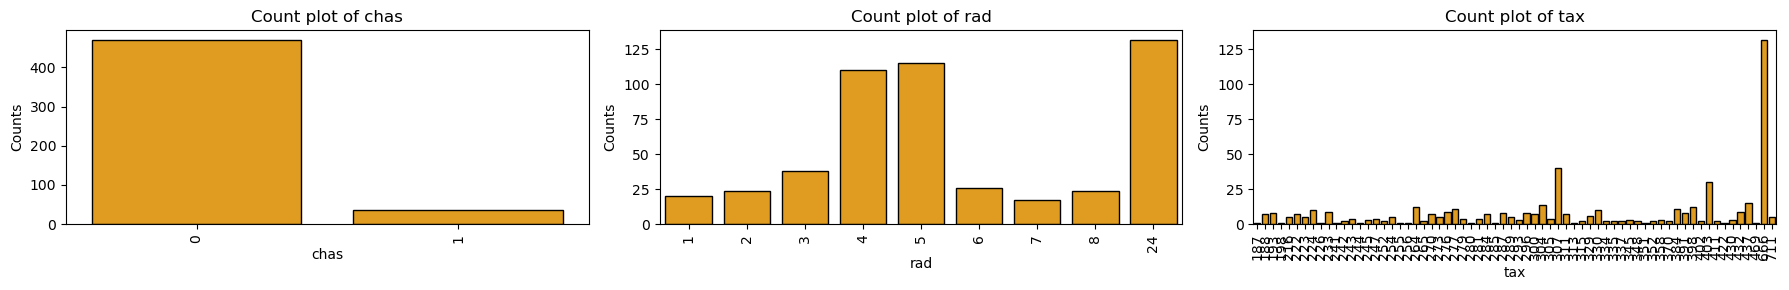

In [285]:
plt.figure(figsize=(18,3))

discrete_features = df.select_dtypes(include = 'int64').columns
d_rows = np.ceil(len(discrete_features) / 3).astype('int64')

for i, disf in enumerate (discrete_features):

    plt.subplot(d_rows, 3, i+1)
    
    sns.countplot(data = df, x = disf, color = 'orange', edgecolor = 'black')
    plt.title(f'Count plot of {disf}')
    plt.xlabel(disf)
    plt.ylabel('Counts')
    plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

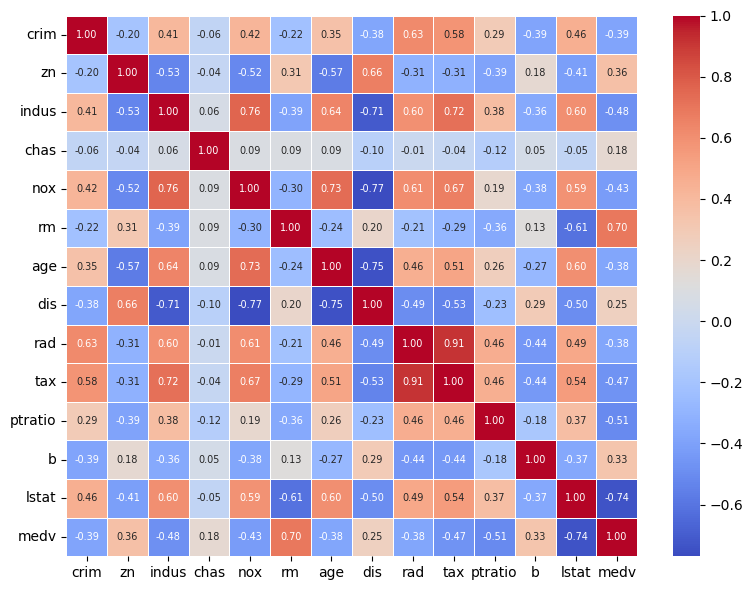

In [286]:
plt.figure(figsize=(8,6))

corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths=0.5, annot_kws={"size": 7})
plt.tight_layout()
plt.show()

## 4. Feature Engineering

**Dealing with Skewness**

The histograms show that some features have a high skewness. We first check the skewness of each feature and then transform the features with an absolute skewness > 0.75 (moderate to high skewness)


In [288]:
skewness = df.skew().sort_values(ascending=False)
print(skewness)

crim       5.223149
chas       3.405904
zn         2.225666
medv       1.108098
dis        1.011781
rad        1.004815
lstat      0.906460
nox        0.729308
tax        0.669956
rm         0.405418
indus      0.295022
age       -0.598963
ptratio   -0.802325
b         -2.890374
dtype: float64


In [289]:
from sklearn.preprocessing import PowerTransformer
pt_yj = PowerTransformer(method='yeo-johnson')

df_transformed = df.copy()

# Right-skewed features. We don't apply this transformation to 'chas' at it's a binary feature
df_transformed['crim'] = np.log1p(df_transformed['crim'])
df_transformed['zn'] = np.log1p(df_transformed['zn'])
df_transformed['dis'] = np.log1p(df_transformed['dis'])
df_transformed['rad'] = np.log1p(df_transformed['rad'])
df_transformed['lstat'] = np.log1p(df_transformed['lstat'])

# Left-skewed feature. We don't apply this transformation to 'ptratio' at it's a discrete feature
df_transformed['b'] = pt_yj.fit_transform(df_transformed[['b']])

df_transformed.skew().sort_values(ascending=False)

chas       3.405904
crim       1.269201
zn         1.193451
medv       1.108098
nox        0.729308
tax        0.669956
rad        0.532760
rm         0.405418
dis        0.331561
indus      0.295022
lstat     -0.187195
age       -0.598963
ptratio   -0.802325
b         -1.908672
dtype: float64

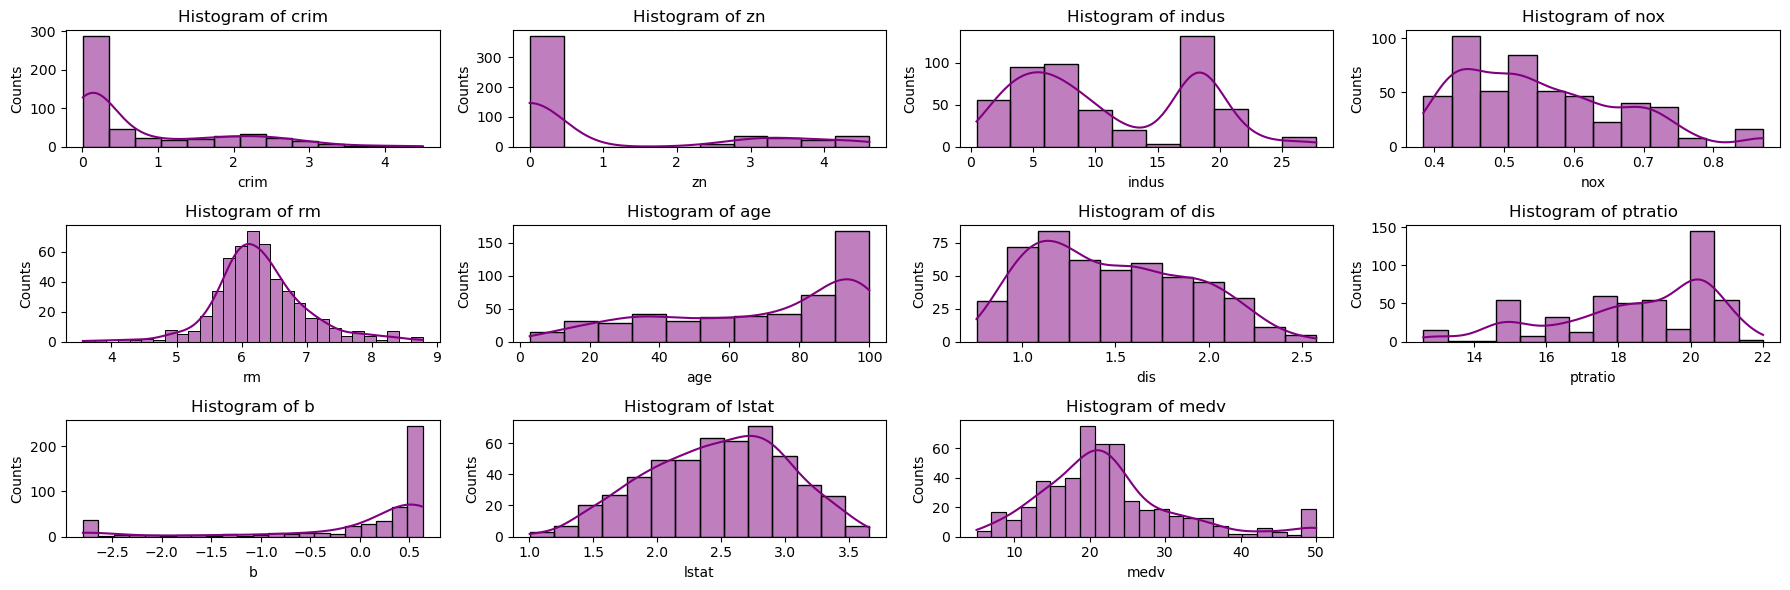

In [290]:
plt.figure(figsize=(18,6))

continuous_features = df.select_dtypes(include = 'float64').columns
c_rows = np.ceil(len(continuous_features) / 4).astype('int64')
n = len(df)

for i, cf in enumerate (continuous_features):

    plt.subplot(c_rows, 4, i+1)
    
    sns.histplot(data=df_transformed, x=cf, kde = True, color = 'purple', edgecolor = 'black')
    plt.title(f'Histogram of {cf}')
    plt.xlabel(cf)
    plt.ylabel('Counts')

plt.tight_layout()
plt.show()

**Dealing with outliers**

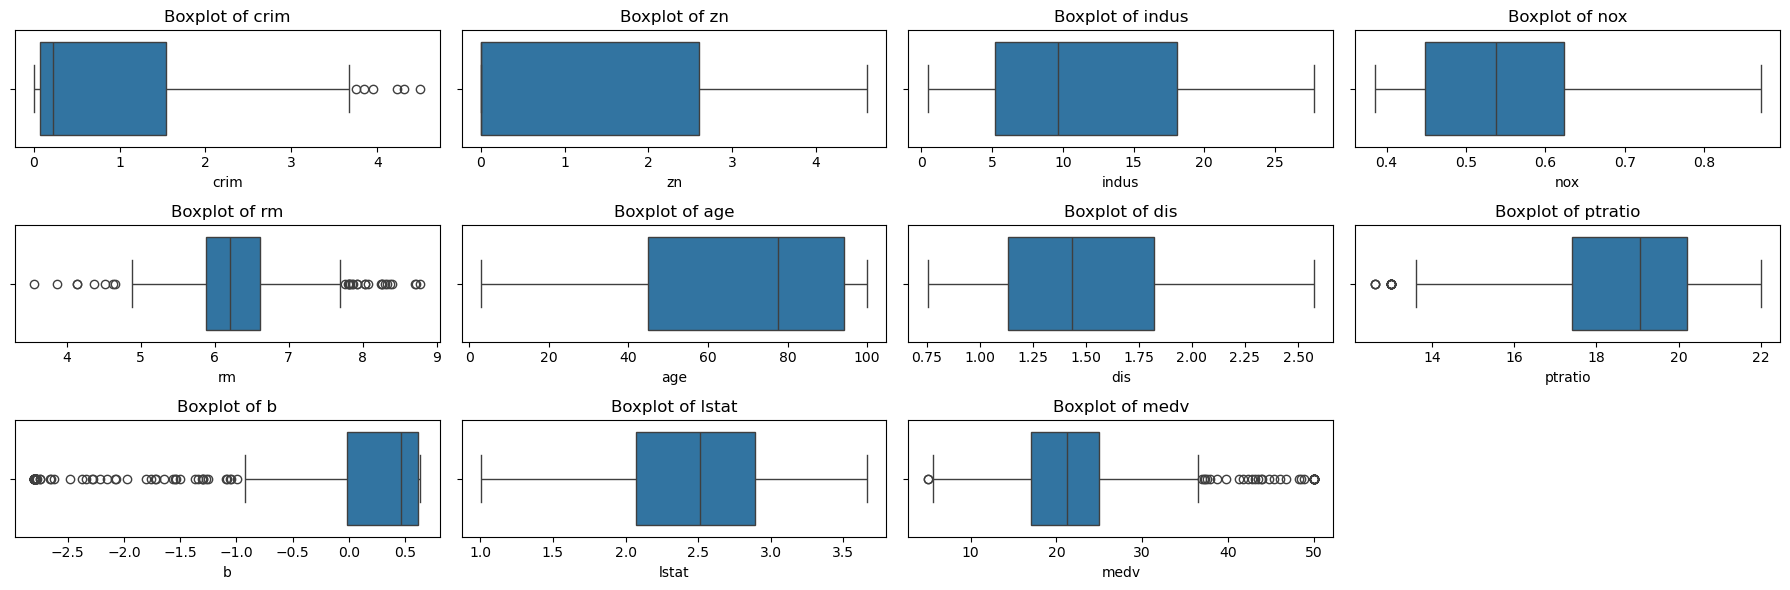

In [292]:
plt.figure(figsize=(18,6))

for i, cf in enumerate (continuous_features):

    plt.subplot(c_rows, 4, i+1)
    
    sns.boxplot(data = df_transformed, x = cf)
    plt.title(f'Boxplot of {cf}')
    plt.xlabel(cf)

plt.tight_layout()
plt.show()

In [293]:
for cf in continuous_features:
   
    Q1 = np.quantile(df_transformed[cf], 0.25)
    Q3 = np.quantile(df_transformed[cf], 0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    outliers = df_transformed[(df_transformed[cf] < lower) | (df_transformed[cf] > upper)][cf]
    outlier_indices = outliers.index
    original_outliers = df.loc[outlier_indices][cf]
    percentage = len(outliers)/len(df_transformed[cf])
    
    if percentage > 0:
        print(f"Column {cf}:")
        print(f"Count of outliers: {len(outliers)}")
        print(f"Percentage of outliers: {percentage:.2f}%")
        print(f"Outliers original dataset: {np.sort(np.array(original_outliers))}")
        print(f"Outlier indices: {np.array(outlier_indices).tolist()}")
        print()

Column crim:
Count of outliers: 6
Percentage of outliers: 0.01%
Outliers original dataset: [41.5292 45.7461 51.1358 67.9208 73.5341 88.9762]
Outlier indices: [380, 404, 405, 410, 414, 418]

Column rm:
Count of outliers: 30
Percentage of outliers: 0.06%
Outliers original dataset: [3.561 3.863 4.138 4.138 4.368 4.519 4.628 4.652 7.765 7.802 7.82  7.82
 7.831 7.853 7.875 7.923 7.929 8.034 8.04  8.069 8.247 8.259 8.266 8.297
 8.337 8.375 8.398 8.704 8.725 8.78 ]
Outlier indices: [97, 98, 162, 163, 166, 180, 186, 195, 203, 204, 224, 225, 226, 232, 233, 253, 257, 262, 267, 280, 283, 364, 365, 367, 374, 384, 386, 406, 412, 414]

Column ptratio:
Count of outliers: 15
Percentage of outliers: 0.03%
Outliers original dataset: [12.6 12.6 12.6 13.  13.  13.  13.  13.  13.  13.  13.  13.  13.  13.
 13. ]
Outlier indices: [196, 197, 198, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268]

Column b:
Count of outliers: 70
Percentage of outliers: 0.14%
Outliers original dataset: [3.2000e-01 2.5

After analysing the outliers in detail we reach following conclusions:
There are two cities with a MEDV of 5, which seems to be a very low value, but if you analyze the other columns, it might be possible. These are two cities with a high crime rate that have no proportion of residential land, but a high proportion of industrial and commercial land. Air pollution (NOX) is also quite high and the number of rooms is below average. All buildings in these two cities were built before 1940 and they have the worst index for highway accessibility. Finally, the percentage of the population with low status is also very high.

On the other hand, there are some cities with very expensive houses in comparison. If we do the same exercise as before, we see no reason to believe that these values could be wrong.

The outliers in the other columns also appear to be correct values.

**Feature Selection**

- Low variance features:

In [295]:
features = df_transformed.drop("medv", axis=1)

means = features.mean()
stds = features.std()

cv = stds / means
print(cv.sort_values())

low_cv_features = cv[cv < 0.01].index
print("Features with very low relative variance:", low_cv_features.tolist())

rm         1.117198e-01
ptratio    1.173060e-01
nox        2.089034e-01
lstat      2.177373e-01
dis        2.793843e-01
rad        3.659505e-01
age        4.104834e-01
tax        4.128412e-01
indus      6.160087e-01
crim       1.257325e+00
zn         1.699211e+00
chas       3.672028e+00
b          2.227614e+15
dtype: float64
Features with very low relative variance: []


- Highly correlated features (multicollinearity)


In [297]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

features = add_constant(features)
vif = pd.DataFrame()
vif["feature"] = features.columns
vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
print(vif.sort_values("VIF", ascending=False))

    feature         VIF
0     const  701.591055
10      tax    7.106059
1      crim    6.235881
9       rad    5.843808
8       dis    5.096559
5       nox    4.716334
3     indus    4.021263
13    lstat    3.347539
7       age    3.321041
2        zn    2.325567
6        rm    2.071140
11  ptratio    1.876757
12        b    1.426286
4      chas    1.077266


In the table above, we can see that some features (‘tax’, ‘crim’, ‘rad’) have multicollinearity. We can consider deleting one of them or using a regularised regression (ridge or lasso) to address this issue.

## 5. Choose, train and evaluate the Model

**Model: Linear Regression (without handling skewness)**

In [300]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define X and y
X = df.drop(['medv'], axis=1)
y = df['medv']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Standard Scaling to avoid features with larger scales dominating others
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make the predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Calculate MAE, RMSE and R2 for the training dataset
lr_mae_train = mean_absolute_error(y_train, y_train_pred)
lr_rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
lr_r2_train = r2_score(y_train, y_train_pred)

# Calculate MAE, RMSE and R2 for the test dataset
lr_mae_test = mean_absolute_error(y_test, y_test_pred)
lr_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
lr_r2_test = r2_score(y_test, y_test_pred)

lr_metrics = {
    'Metric': ['MAE','RMSE','R²'],
    'Train': [lr_mae_train, lr_rmse_train, lr_r2_train],
    'Test': [lr_mae_test, lr_rmse_test, lr_r2_test]
}

lr_results_df = pd.DataFrame(lr_metrics)
print(f"Mean MEDV (target variable): {np.mean(df['medv']):.2f}")
print("")
lr_results_df

Mean MEDV (target variable): 22.53



,Metric,Train,Test
0,MAE,3.318527,3.206404
1,RMSE,4.656864,4.940124
2,R²,0.750368,0.667209


**Model: Linear Regression (handling skewness)**

In [302]:
# Define X and y
X_transformed = df_transformed.drop(['medv'], axis=1)
y_transformed = df_transformed['medv']

# Train-Test Split
X_transformed_train, X_transformed_test, y_transformed_train, y_transformed_test = train_test_split(X_transformed, y_transformed, test_size = 0.2, random_state = 42)

# Standard Scaling to avoid features with larger scales dominating others
scaler = StandardScaler()
X_transformed_train_scaled = scaler.fit_transform(X_transformed_train)
X_transformed_test_scaled = scaler.transform(X_transformed_test)

# Create the model
lr_model = LinearRegression()
lr_model.fit(X_transformed_train_scaled, y_transformed_train)

# Make the predictions
y_transformed_train_pred = lr_model.predict(X_transformed_train_scaled)
y_transformed_test_pred = lr_model.predict(X_transformed_test_scaled)

# Calculate MAE, RMSE and R2 for the training dataset
lr_mae_transformed_train = mean_absolute_error(y_transformed_train, y_transformed_train_pred)
lr_rmse_transformed_train = np.sqrt(mean_squared_error(y_transformed_train, y_transformed_train_pred))
lr_r2_transformed_train = r2_score(y_transformed_train, y_transformed_train_pred)

# Calculate MAE, RMSE and R2 for the test dataset
lr_mae_transformed_test = mean_absolute_error(y_transformed_test, y_transformed_test_pred)
lr_rmse_transformed_test = np.sqrt(mean_squared_error(y_transformed_test, y_transformed_test_pred))
lr_r2_transformed_test = r2_score(y_transformed_test, y_transformed_test_pred)

lr_transformed_metrics = {
    'Metric': ['MAE','RMSE','R²'],
    'Train': [lr_mae_transformed_train, lr_rmse_transformed_train, lr_r2_transformed_train],
    'Test': [lr_mae_transformed_test, lr_rmse_transformed_test, lr_r2_transformed_test]
}

lr_transformed_results_df = pd.DataFrame(lr_transformed_metrics)
print(f"Mean MEDV (target variable): {np.mean(df['medv']):.2f}")
print("")
lr_transformed_results_df

Mean MEDV (target variable): 22.53



,Metric,Train,Test
0,MAE,3.147968,2.940230
1,RMSE,4.232640,4.348191
2,R²,0.793778,0.742182


**Model: Linear Regression (handling skewness and dealing with multicollinearity)**

Let's drop the features ‘tax’ and ‘crim’ to see if our regression model improves.

In [304]:
# Define X and y
X_reduced = df_transformed.drop(['tax','crim','medv'], axis=1)
y_reduced = df_transformed['medv']

# Train-Test Split
X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test = train_test_split(X_reduced, y_reduced, test_size = 0.2, random_state = 42)

# Standard Scaling to avoid features with larger scales dominating others
scaler = StandardScaler()
X_reduced_train_scaled = scaler.fit_transform(X_reduced_train)
X_reduced_test_scaled = scaler.transform(X_reduced_test)

# Create the model
lr_model = LinearRegression()
lr_model.fit(X_reduced_train_scaled, y_reduced_train)

# Make the predictions
y_reduced_train_pred = lr_model.predict(X_reduced_train_scaled)
y_reduced_test_pred = lr_model.predict(X_reduced_test_scaled)

# Calculate MAE, RMSE and R2 for the training dataset
lr_mae_reduced_train = mean_absolute_error(y_reduced_train, y_reduced_train_pred)
lr_rmse_reduced_train = np.sqrt(mean_squared_error(y_reduced_train, y_reduced_train_pred))
lr_r2_reduced_train = r2_score(y_reduced_train, y_reduced_train_pred)

# Calculate MAE, RMSE and R2 for the test dataset
lr_mae_reduced_test = mean_absolute_error(y_reduced_test, y_reduced_test_pred)
lr_rmse_reduced_test = np.sqrt(mean_squared_error(y_reduced_test, y_reduced_test_pred))
lr_r2_reduced_test = r2_score(y_reduced_test, y_reduced_test_pred)

lr_reduced_metrics = {
    'Metric': ['MAE','RMSE','R²'],
    'Train': [lr_mae_reduced_train, lr_rmse_reduced_train, lr_r2_reduced_train],
    'Test': [lr_mae_reduced_test, lr_rmse_reduced_test, lr_r2_reduced_test]
}

lr_reduced_results_df = pd.DataFrame(lr_reduced_metrics)
print(f"Mean MEDV (target variable): {np.mean(df['medv']):.2f}")
print("")
results_lr_reduced_df

Mean MEDV (target variable): 22.53



,Metric,Train,Test
0,MAE,3.197311,2.941593
1,RMSE,4.323268,4.425098
2,R²,0.784852,0.732981


**Regularization method: Ridge Regression**

Ridge Regression (L2 penalty) shrinks coefficients but does not set them to zero. Helps with multicollinearity but keeps all features.

In [306]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

# Define a list of alpha values to try
alphas = np.logspace(-4, 3, 50)

# Initialise and fit RidgeCV
ridge_cv = RidgeCV(alphas=alphas, cv=5)  # 5-fold cross-validation
ridge_cv.fit(X_transformed_train_scaled, y_transformed_train)

# Create the model
ridge_model = ridge_cv

# Make the predictions
y_ridge_train_pred = ridge_model.predict(X_transformed_train_scaled)
y_ridge_test_pred = ridge_model.predict(X_transformed_test_scaled)

# Calculate MAE, RMSE and R2 for the training dataset
ridge_mae_train = mean_absolute_error(y_transformed_train, y_ridge_train_pred)
ridge_rmse_train = np.sqrt(mean_squared_error(y_transformed_train, y_ridge_train_pred))
ridge_r2_train = r2_score(y_transformed_train, y_ridge_train_pred)

# Calculate MAE, RMSE and R2 for the test dataset
ridge_mae_test = mean_absolute_error(y_transformed_test, y_ridge_test_pred)
ridge_rmse_test = np.sqrt(mean_squared_error(y_transformed_test, y_ridge_test_pred))
ridge_r2_test = r2_score(y_transformed_test, y_ridge_test_pred)

ridge_metrics = {
    'Metric': ['MAE','RMSE','R²'],
    'Train': [ridge_mae_train, ridge_rmse_train, ridge_r2_train],
    'Test': [ridge_mae_test, ridge_rmse_test, ridge_r2_test]
}

ridge_results_df = pd.DataFrame(ridge_metrics)
print(f"Mean MEDV (target variable): {np.mean(df['medv']):.2f}")
print("")
ridge_results_df

Mean MEDV (target variable): 22.53



,Metric,Train,Test
0,MAE,3.135155,2.915515
1,RMSE,4.233661,4.354994
2,R²,0.793678,0.741375


**Regularization method: Lasso Regression**

Lasso Regression (L1 penalty): Can shrink some coefficients to zero, so it's useful for feature selection.

In [308]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

# Initialise and fit LassoCV
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000)  # 5-fold cross-validation
lasso_cv.fit(X_transformed_train_scaled, y_transformed_train)

# Create the model
lasso_model = lasso_cv

# Make the predictions
y_lasso_train_pred = lasso_model.predict(X_transformed_train_scaled)
y_lasso_test_pred = lasso_model.predict(X_transformed_test_scaled)

# Calculate MAE, RMSE and R2 for the training dataset
lasso_mae_train = mean_absolute_error(y_transformed_train, y_lasso_train_pred)
lasso_rmse_train = np.sqrt(mean_squared_error(y_transformed_train, y_lasso_train_pred))
lasso_r2_train = r2_score(y_transformed_train, y_lasso_train_pred)

# Calculate MAE, RMSE and R2 for the test dataset
lasso_mae_test = mean_absolute_error(y_transformed_test, y_lasso_test_pred)
lasso_rmse_test = np.sqrt(mean_squared_error(y_transformed_test, y_lasso_test_pred))
lasso_r2_test = r2_score(y_transformed_test, y_lasso_test_pred)

lasso_metrics = {
    'Metric': ['MAE','RMSE','R²'],
    'Train': [lasso_mae_train, lasso_rmse_train, lasso_r2_train],
    'Test': [lasso_mae_test, lasso_rmse_test, lasso_r2_test]
}

lasso_results_df = pd.DataFrame(lasso_metrics)
print(f"Mean MEDV (target variable): {np.mean(df['medv']):.2f}")
print("")
lasso_results_df

Mean MEDV (target variable): 22.53



,Metric,Train,Test
0,MAE,3.138666,2.925596
1,RMSE,4.233665,4.355872
2,R²,0.793678,0.741270


**Model: Polynomial Regression**

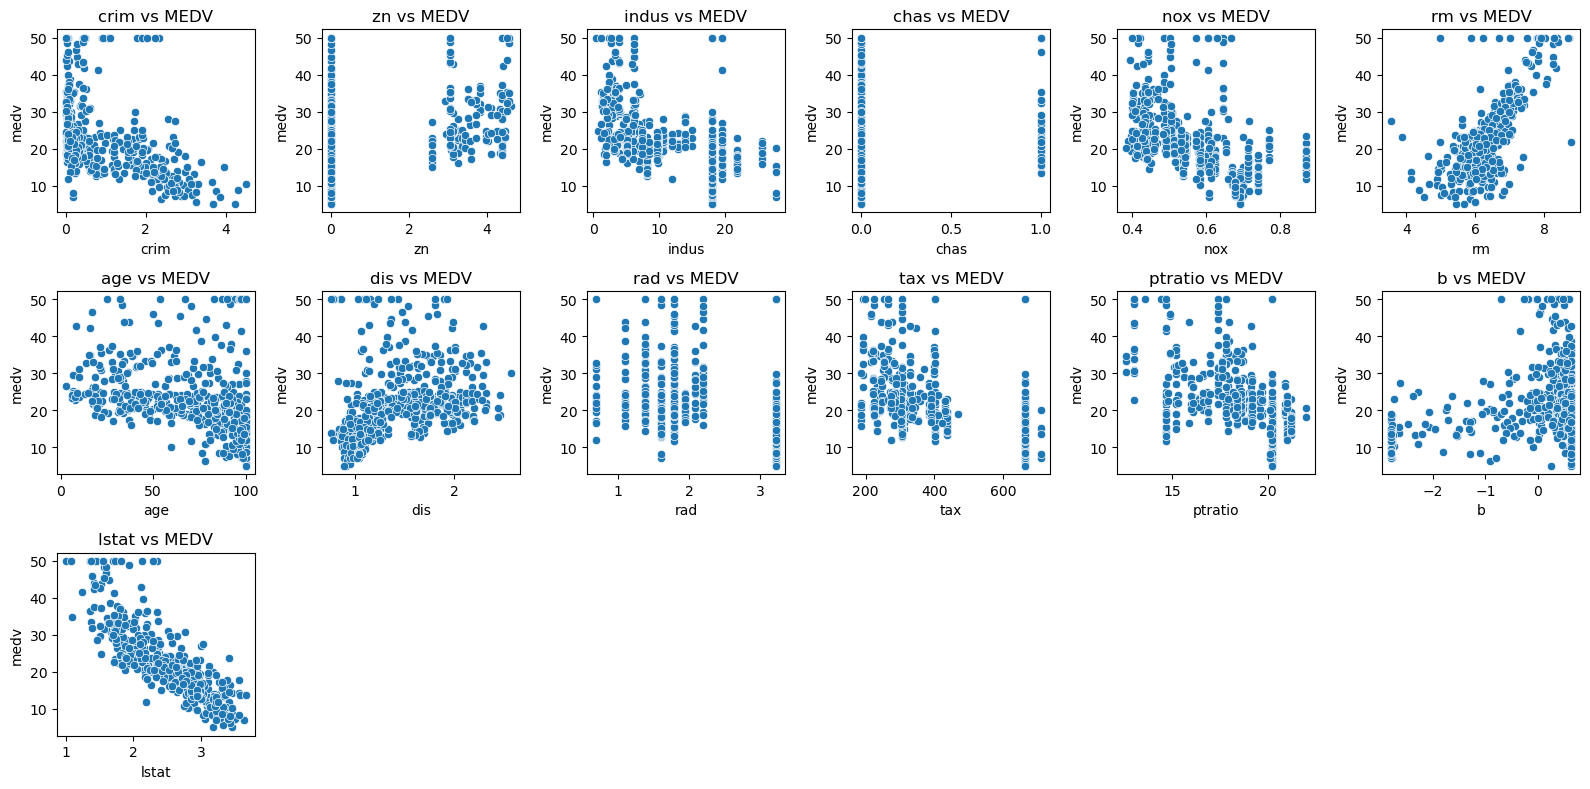

In [310]:
plt.figure(figsize=(16,8))
for i, col in enumerate (X_transformed.columns):

    plt.subplot(3, 6, i+1)
    sns.scatterplot(x=df_transformed[col], y=df_transformed['medv'])
    plt.title(f"{col} vs MEDV")

plt.tight_layout()
plt.show()

In [311]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only = True)
X_train_poly = poly.fit_transform(X_transformed_train_scaled)
X_test_poly = poly.transform(X_transformed_test_scaled)

# Create the model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_transformed_train)

# Make the predictions
y_poly_train_pred = poly_model.predict(X_train_poly)
y_poly_test_pred = poly_model.predict(X_test_poly)

# Calculate MAE, RMSE and R2 for the training dataset
poly_mae_train = mean_absolute_error(y_transformed_train, y_poly_train_pred)
poly_rmse_train = np.sqrt(mean_squared_error(y_transformed_train, y_poly_train_pred))
poly_r2_train = r2_score(y_transformed_train, y_poly_train_pred)

# Calculate MAE, RMSE and R2 for the test dataset
poly_mae_test = mean_absolute_error(y_transformed_test, y_poly_test_pred)
poly_rmse_test = np.sqrt(mean_squared_error(y_transformed_test, y_poly_test_pred))
poly_r2_test = r2_score(y_transformed_test, y_poly_test_pred)

poly_metrics = {
    'Metric': ['MAE','RMSE','R²'],
    'Train': [poly_mae_train, poly_rmse_train, poly_r2_train],
    'Test': [poly_mae_test, poly_rmse_test, poly_r2_test]
}

poly_results_df = pd.DataFrame(poly_metrics)
print(f"Mean MEDV (target variable): {np.mean(df['medv']):.2f}")
print("")
poly_results_df

Mean MEDV (target variable): 22.53



,Metric,Train,Test
0,MAE,1.784638,2.405382
1,RMSE,2.365947,3.500011
2,R²,0.935565,0.832955


**Model: RandomForest**

In [313]:
from sklearn.ensemble import RandomForestRegressor
# It's not necessary to use the transformed and scaled data

# Create the model
rf_model = RandomForestRegressor(n_estimators=100, # Number of trees. More trees --> better performance, slower training.
                                 max_depth=5, # Maximum depth of each tree. Controls tree complexity. Crucial to avoid overfitting.
                                 min_samples_split = 3, # Minimum samples needed to split an internal node. Help generalisation by enforcing minimum data at nodes.
                                 min_samples_leaf=1, # Minimum samples required to be at a leaf node. Help generalisation by enforcing minimum data at nodes.
                                 max_features = 0.7, # Number of features to consider when looking for the best split. Adds randomness, reduces correlation between trees.
                                 random_state=42
                                )
rf_model.fit(X_train, y_train)

# Make the predictions
y_rf_train_pred = rf_model.predict(X_train)
y_rf_test_pred = rf_model.predict(X_test)


# Calculate MAE, RMSE and R2 for the training dataset
rf_mae_train = mean_absolute_error(y_train, y_rf_train_pred)
rf_rmse_train = np.sqrt(mean_squared_error(y_train, y_rf_train_pred))
rf_r2_train = r2_score(y_train, y_rf_train_pred)

# Calculate MAE, RMSE and R2 for the test dataset
rf_mae_test = mean_absolute_error(y_test, y_rf_test_pred)
rf_rmse_test = np.sqrt(mean_squared_error(y_test, y_rf_test_pred))
rf_r2_test = r2_score(y_test, y_rf_test_pred)

rf_metrics = {
    'Metric': ['MAE','RMSE','R²'],
    'Train': [rf_mae_train, rf_rmse_train, rf_r2_train],
    'Test': [rf_mae_test, rf_rmse_test, rf_r2_test]
}

rf_results_df = pd.DataFrame(rf_metrics)
print(f"Mean MEDV (target variable): {np.mean(df['medv']):.2f}")
print("")
rf_results_df

Mean MEDV (target variable): 22.53



,Metric,Train,Test
0,MAE,1.805723,2.193944
1,RMSE,2.389564,2.937243
2,R²,0.934272,0.882354


**Model: Support Vector Regression (SVR)**

In [315]:
from sklearn.svm import SVR

# Create the model
svr_model = SVR(kernel='rbf', # Transformation. Maps data into higher dimension for nonlinear relationships.
                C=50, # Regularisation. Controls trade-off between training error and model complexity.
                epsilon=0.5, # Defines margin of tolerance where no penalty is given for errors.
                gamma = 'scale' # For RBF/poly kernel only. Controls the influence of a single training point.
               )
svr_model.fit(X_transformed_train_scaled, y_transformed_train)

# Make the predictions
y_svr_train_pred = svr_model.predict(X_transformed_train_scaled)
y_svr_test_pred = svr_model.predict(X_transformed_test_scaled)

# Calculate MAE, RMSE and R2 for the training dataset
svr_mae_train = mean_absolute_error(y_transformed_train, y_svr_train_pred)
svr_rmse_train = np.sqrt(mean_squared_error(y_transformed_train, y_svr_train_pred))
svr_r2_train = r2_score(y_transformed_train, y_svr_train_pred)

# Calculate MAE, RMSE and R2 for the test dataset
svr_mae_test = mean_absolute_error(y_transformed_test, y_svr_test_pred)
svr_rmse_test = np.sqrt(mean_squared_error(y_transformed_test, y_svr_test_pred))
svr_r2_test = r2_score(y_transformed_test, y_svr_test_pred)

svr_metrics = {
    'Metric': ['MAE','RMSE','R²'],
    'Train': [svr_mae_train, svr_rmse_train, svr_r2_train],
    'Test': [svr_mae_test, svr_rmse_test, svr_r2_test]
}

svr_results_df = pd.DataFrame(svr_metrics)
print(f"Mean MEDV (target variable): {np.mean(df['medv']):.2f}")
print("")
svr_results_df

Mean MEDV (target variable): 22.53



,Metric,Train,Test
0,MAE,1.077900,1.828305
1,RMSE,1.747413,3.073444
2,R²,0.964852,0.871191


**Model: XGBoost**

In [317]:
from xgboost import XGBRegressor
# It's not necessary to use the transformed and scaled data

# Create the model
xgb_model = XGBRegressor(n_estimators=300,
                         learning_rate=0.05,
                         max_depth=2,
                         subsample=0.8,
                         colsample_bytree=0.8,
                         reg_alpha=0.5,
                         reg_lambda=1.0,
                         random_state=42
                        )
xgb_model.fit(X_train,y_train)

# Make the predictions
y_xgb_train_pred = xgb_model.predict(X_train)
y_xgb_test_pred = xgb_model.predict(X_test)

# Calculate MAE, RMSE and R2 for the training dataset
xgb_mae_train = mean_absolute_error(y_train, y_xgb_train_pred)
xgb_rmse_train = np.sqrt(mean_squared_error(y_train, y_xgb_train_pred))
xgb_r2_train = r2_score(y_train, y_xgb_train_pred)

# Calculate MAE, RMSE and R2 for the test dataset
xgb_mae_test = mean_absolute_error(y_test, y_xgb_test_pred)
xgb_rmse_test = np.sqrt(mean_squared_error(y_test, y_xgb_test_pred))
xgb_r2_test = r2_score(y_test, y_xgb_test_pred)

xgb_metrics = {
    'Metric': ['MAE','RMSE','R²'],
    'Train': [xgb_mae_train, xgb_rmse_train, xgb_r2_train],
    'Test': [xgb_mae_test, xgb_rmse_test, xgb_r2_test]
}

xgb_results_df = pd.DataFrame(xgb_metrics)
print(f"Mean MEDV (target variable): {np.mean(df['medv']):.2f}")
print("")
xgb_results_df

Mean MEDV (target variable): 22.53



,Metric,Train,Test
0,MAE,1.509375,1.949537
1,RMSE,2.012788,2.638550
2,R²,0.953365,0.905065


In [318]:
model_names = [
    'Linear Regression',
    'Linear Regression (skewness corrected)',
    'Linear Regression (multicollinearity)',
    'Ridge Regression',
    'Lasso Regression',
    'Polynomial Regression',
    'Random Forest',
    'Support Vector Regression',
    'XGBoost'
]

model_results = [
    lr_results_df,
    lr_transformed_results_df,
    lr_reduced_results_df,
    ridge_results_df,
    lasso_results_df,
    poly_results_df,
    rf_results_df,
    svr_results_df,
    xgb_results_df
]

results_list = []

for name, model in zip(model_names, model_results):
    results_list.append({
        'Model': name,
        'Mean MEDV': round(np.mean(df['medv']), 3),
        'MAE (Test)': round(model.loc[0, 'Test'], 3),
        'RMSE (Test)': round(model.loc[1, 'Test'], 3),
        'R² (Train)': round(model.loc[2, 'Train'], 3),
        'R² (Test)': round(model.loc[2, 'Test'], 3
                          )
    })

# Create and sort summary DataFrame
summary_results = pd.DataFrame(results_list)
summary_results = summary_results.sort_values(by='R² (Test)', ascending=False).reset_index(drop=True)

# Display the final comparison
summary_results

,Model,Mean MEDV,MAE (Test),RMSE (Test),R² (Train),R² (Test)
0,XGBoost,22.533,1.950,2.639,0.953,0.905
1,Random Forest,22.533,2.194,2.937,0.934,0.882
2,Support Vector Regression,22.533,1.828,3.073,0.965,0.871
3,Polynomial Regression,22.533,2.405,3.500,0.936,0.833
4,Linear Regression (skewness corrected),22.533,2.940,4.348,0.794,0.742
5,Ridge Regression,22.533,2.916,4.355,0.794,0.741
6,Lasso Regression,22.533,2.926,4.356,0.794,0.741
7,Linear Regression (multicollinearity),22.533,2.942,4.425,0.785,0.733
8,Linear Regression,22.533,3.206,4.940,0.750,0.667


In this analysis, we've compared multiple regression models to predict the median value of owner-occupied homes (MEDV) in the Boston housing dataset. The table above summarizes the key performance metrics.

The XGBoost model clearly outperforms the others in terms of accuracy, achieving the second lowest MAE and the lowest RMSE on the test data while maintaining a high R². This demonstrates its strong ability to generalize without overfitting.

Classical linear models, including Ridge and Lasso, showed reasonable performance but were consistently outperformed by ensemble and kernel-based methods like Random Forest and SVR. Polynomial regression improved on linear models but still lagged behind ensemble methods.